In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
from xgboost import XGBClassifier
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df = pd.read_csv('data.csv', delimiter=';')
df.columns = df.columns.str.strip()

df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object' or col in [
        'Marital status', 'Application mode', 'Previous qualification', 'Course',
        'Nacionality', "Mother's qualification", "Father's qualification",
        "Mother's occupation", "Father's occupation", 'Displaced',
        'Educational special needs', 'Debtor', 'Tuition fees up to date',
        'Gender', 'Scholarship holder', 'International', 'Target'
    ]:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


In [ ]:
#splitt fitur dan target
X = df.drop('Target', axis=1)
y = df['Target']


In [ ]:
#scaling numerical
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#split training test dengan stratify
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
#modeling xgbost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [ ]:
#akurasi
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


Accuracy: 0.7672316384180791


In [ ]:
#klasifikasi report
target_names = label_encoders['Target'].classes_
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, target_names=target_names))



Classification Report:
               precision    recall  f1-score   support

     Dropout       0.81      0.74      0.77       284
    Enrolled       0.51      0.45      0.48       159
    Graduate       0.82      0.90      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.70      0.70       885
weighted avg       0.76      0.77      0.76       885



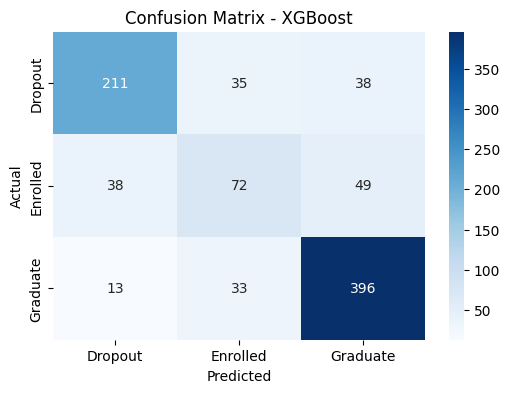

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [ ]:
# Cohen's Kappa
print("Cohen's Kappa Score:", cohen_kappa_score(y_test, y_pred_xgb))



Cohen's Kappa Score: 0.6146244432653873
